In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
gdp_df['Value Footnotes'].unique()

array([nan])

#### 5.How many rows and columns are in gdp_df? What are the data types of each column?

In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

##### 6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'


In [8]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [9]:
gdp_df=gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_capita'})
gdp_df

,Country,Year,GDP_Per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


##### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
country_yr_ct=gdp_df.Country.value_counts()
country_yr_ct

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [12]:
country_df=country_yr_ct.to_frame()
country_df

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [13]:
country_df.loc[ country_df['count']<gdp_df.Year.nunique() ]

,count
Country,
Hungary,32
Lebanon,32
Aruba,32
Tonga,32
Bhutan,32
Slovak Republic,31
Kuwait,31
Turkmenistan,31
Cambodia,30


In [14]:
print("Countries missing data in year column" )
country_df.loc[country_df['count']<33]

Countries missing data in year column


,count
Country,
Hungary,32
Lebanon,32
Aruba,32
Tonga,32
Bhutan,32
Slovak Republic,31
Kuwait,31
Turkmenistan,31
Cambodia,30


In [15]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [16]:
# Look at the number of observations per year. What do you notice?
gdp_df.groupby('Year')['Country'].nunique()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64

In [17]:
gdp_df['Country'].nunique()

242

In [18]:
gdp_df.groupby('Year')['Country'].nunique()[gdp_df.groupby('Year')['Country'].nunique()==gdp_df['Country'].nunique()]

Year
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: Country, dtype: int64

In [19]:
gdp_df.groupby('Year')['Country'].nunique()[gdp_df.groupby('Year')['Country'].nunique()==gdp_df['Country'].nunique()].count()

8

#only 8 consecutive year from 2013 to 2020 saw all the 242 countries records

##### 8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice.when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [22]:
gdp_2020=gdp_df.loc[gdp_df['Year']==2020]
gdp_2020

,Country,Year,GDP_Per_capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


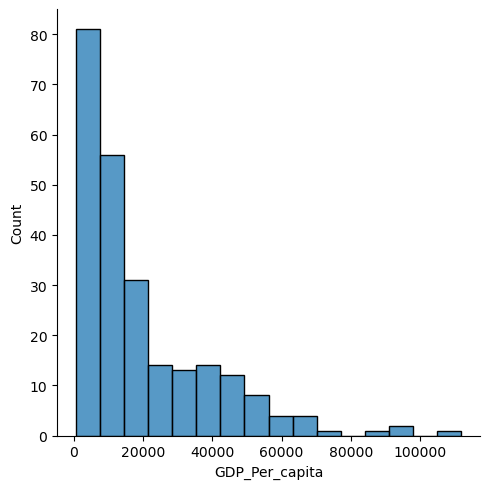

In [23]:
# Plot the histogram thanks to the displot function
sns.displot( data=gdp_2020['GDP_Per_capita'])


<Axes: xlabel='GDP_Per_capita', ylabel='Count'>

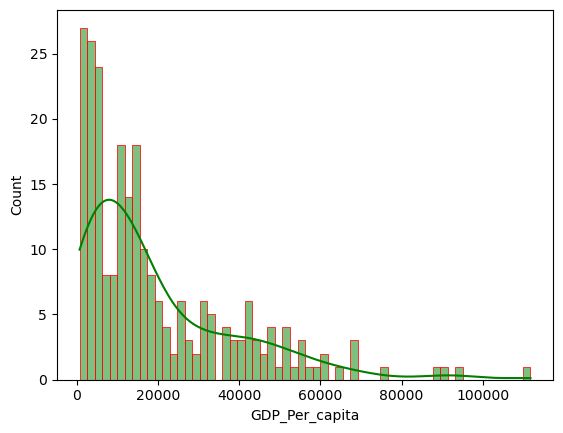

In [24]:
# Plot the histogram thanks to the displot function
sns.histplot(gdp_2020['GDP_Per_capita'], bins=60, kde=True, color='green',edgecolor='red' )


In [25]:
Year_country=gdp_df.Year.value_counts()
Year_country

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [26]:
year_df=Year_country.to_frame()
year_df=year_df.reset_index()
year_df.head()

,Year,count
0,2013,242
1,2016,242
2,2014,242
3,2015,242
4,2020,242


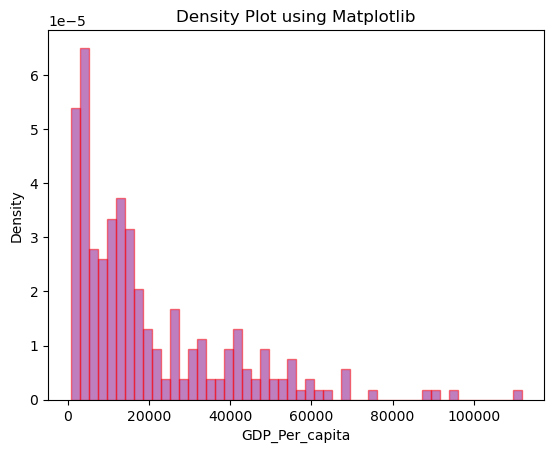

In [27]:

plt.hist(gdp_2020['GDP_Per_capita'], bins=50, density=True, alpha=0.5, color='Purple',edgecolor='red')
plt.title('Density Plot using Matplotlib')
plt.xlabel('GDP_Per_capita')
plt.ylabel('Density')
plt.show()


<Axes: xlabel='Year', ylabel='GDP_Per_capita'>

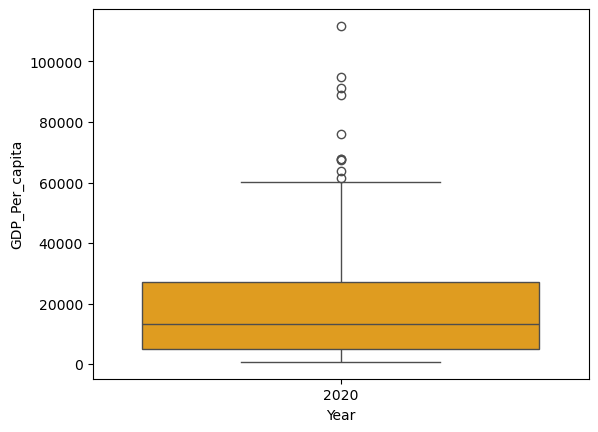

In [28]:
sns.boxplot(x='Year',y='GDP_Per_capita',data=gdp_2020,color='orange')

<Axes: xlabel='Year', ylabel='GDP_Per_capita'>

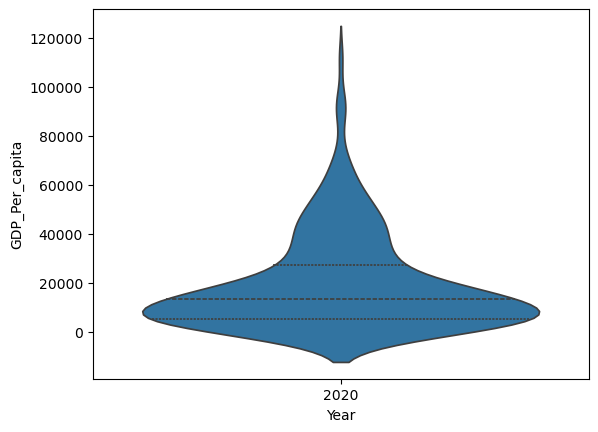

In [29]:
sns.violinplot(x='Year',y='GDP_Per_capita',data=gdp_2020,inner='quartile')

#### 9. What was the median GDP per capita value in 2020?

In [199]:
np.round(gdp_2020['GDP_Per_capita'].median(),decimals=2)

13358.0

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.####


In [33]:
gdp_df_90_20=gdp_df.loc[gdp_df.Year.isin([1990,2000,2010,2020])]
gdp_df_90_20.head()

,Country,Year,GDP_Per_capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


Text(0.5, 1.0, 'Boxplot on GDP_Per_capita on 1990,2000,2010,2020')

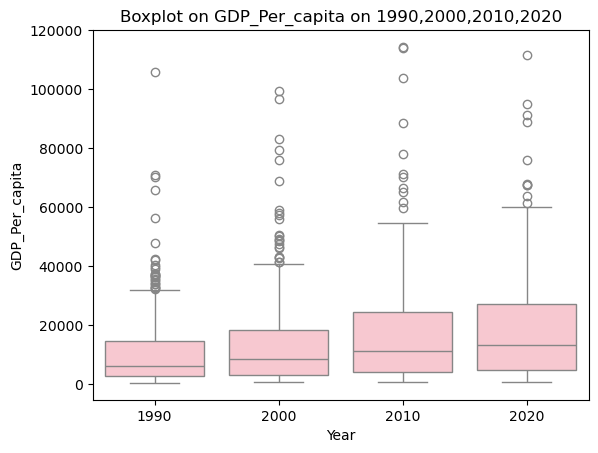

In [34]:
sns.boxplot(x='Year',y='GDP_Per_capita',data=gdp_df_90_20,color='pink')
plt.title('Boxplot on GDP_Per_capita on 1990,2000,2010,2020')

<Axes: xlabel='GDP_Per_capita', ylabel='Year'>

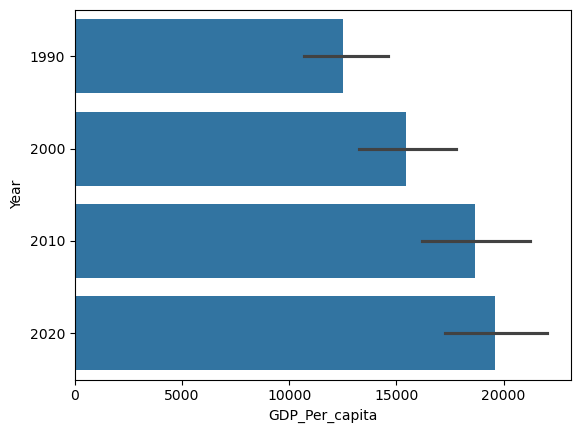

In [35]:
sns.barplot(y='Year',x='GDP_Per_capita',data=gdp_df_90_20, orient='h')

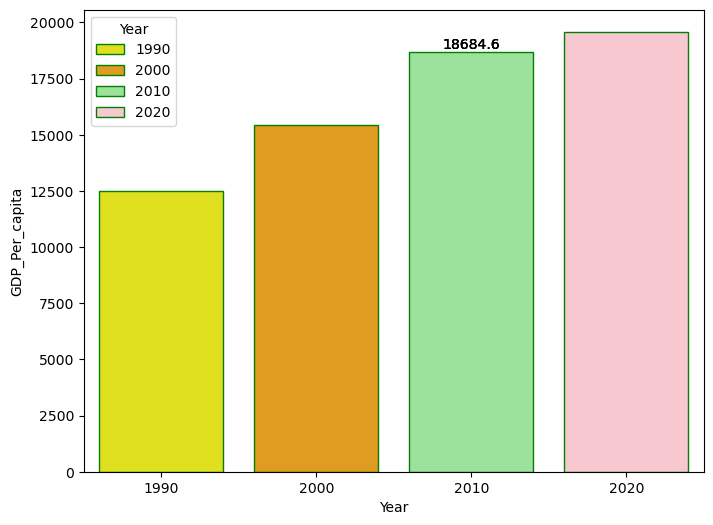

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
palette=['yellow','orange','lightgreen','pink']
sns.barplot(x='Year',y='GDP_Per_capita',data=gdp_df_90_20,hue='Year', palette=palette, errorbar=None,
                 edgecolor='green',ax=ax)
for containers in ax.containers:
    for bars in containers:
        num_bars = len(containers)
        ax.bar_label(ax.containers[num_bars+1])
plt.show()


In [201]:
sns.regplot(y='Year',x='GDP_Per_capita',data=gdp_df_90_20,color='brown',hue='Year',palette=palette)
plt.title('scatter plot 1990-2020')

TypeError: regplot() got an unexpected keyword argument 'hue'

Text(0.5, 1.0, 'scatter plot 1990-2020')

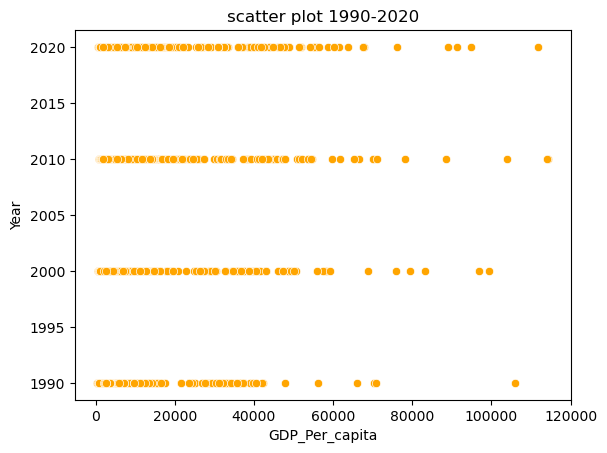

In [203]:
sns.scatterplot(y='Year',x='GDP_Per_capita',data=gdp_df_90_20,color='orange')
plt.title('scatter plot 1990-2020')

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [40]:
print('First Country to have $100,000 as gdp per capita ')
gdp_df.loc[gdp_df['GDP_Per_capita']>100000].sort_values(by='Year')['Country'].head(1)

First Country to have $100,000 as gdp per capita 


7302    United Arab Emirates
Name: Country, dtype: object

#### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [42]:
gdp_high_country=gdp_df_90_20.loc[gdp_df_90_20['Year']==2020].sort_values(['GDP_Per_capita'],ascending=False).head(1)['Country']
gdp_high_country=gdp_high_country.iloc[0]
gdp_high_country

'Luxembourg'

In [43]:
high_gdp= gdp_df.loc[gdp_df['Country']== gdp_high_country]
high_gdp

,Country,Year,GDP_Per_capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


Text(0.5, 1.0, 'High GDP_Per_capita country -- Luxembourg')

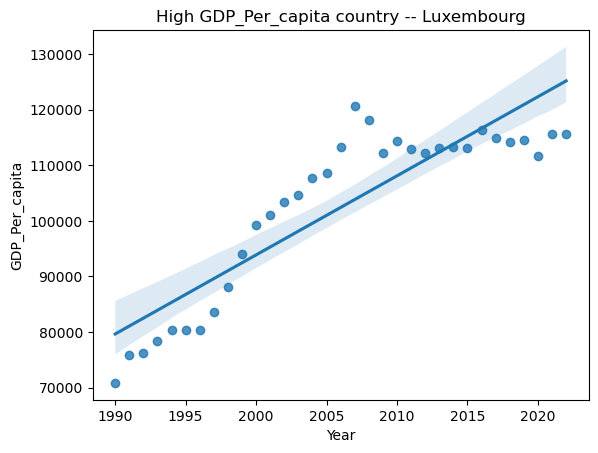

In [44]:
sns.regplot(x='Year',y='GDP_Per_capita',data=high_gdp)
plt.title("High GDP_Per_capita country -- "+gdp_high_country)

#### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [46]:
gdp_low_country=gdp_df_90_20.loc[gdp_df_90_20['Year']==2020].sort_values(['GDP_Per_capita'],ascending=True).head(1)['Country']
gdp_low_country=gdp_low_country.iloc[0]
gdp_low_country

'Burundi'

In [205]:
low_gdp= gdp_df.loc[gdp_df['Country']== gdp_low_country]
low_gdp.head()

,Country,Year,GDP_Per_capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223


Text(0.5, 1.0, 'Low GDP_Per_capita country -- Burundi')

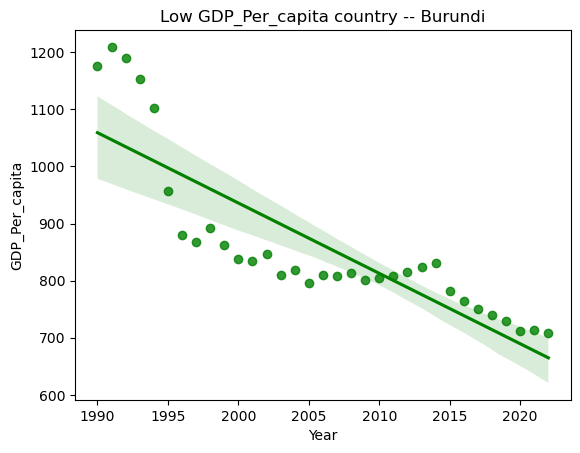

In [48]:
sns.regplot(x='Year',y='GDP_Per_capita',data=low_gdp, color='green')
plt.title("Low GDP_Per_capita country -- "+gdp_low_country)

#### **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [50]:
gdf=gdp_df.loc[gdp_df.Year.isin([1990,2020])]
gdf

,Country,Year,GDP_Per_capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
85,Africa Western and Central,1990,2788.301039
...,...,...,...
7595,World,1990,9705.981267
7598,Zambia,2020,3183.650773
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419


In [51]:
gdf=gdf.pivot_table(index='Country',columns='Year',values='GDP_Per_capita')
gdf

Year,1990,2020
Country,,
Afghanistan,NaN,1968.341002
Africa Eastern and Southern,3037.297466,3455.023119
Africa Western and Central,2788.301039,3957.933804
Albania,4827.027705,13278.369769
Algeria,8828.874473,10844.770764
...,...,...
Viet Nam,2099.394649,10450.622382
West Bank and Gaza,NaN,5402.538773
World,9705.981267,16204.169107


In [52]:
gdf=gdf.reset_index()
gdf

Year,Country,1990,2020
0,Afghanistan,NaN,1968.341002
1,Africa Eastern and Southern,3037.297466,3455.023119
2,Africa Western and Central,2788.301039,3957.933804
3,Albania,4827.027705,13278.369769
4,Algeria,8828.874473,10844.770764
...,...,...,...
237,Viet Nam,2099.394649,10450.622382
238,West Bank and Gaza,NaN,5402.538773
239,World,9705.981267,16204.169107
240,Zambia,2290.039226,3183.650773


In [53]:
gdf['gdp_diff']=gdf[2020]-gdf[1990]
gdf

Year,Country,1990,2020,gdp_diff
0,Afghanistan,NaN,1968.341002,NaN
1,Africa Eastern and Southern,3037.297466,3455.023119,417.725653
2,Africa Western and Central,2788.301039,3957.933804,1169.632765
3,Albania,4827.027705,13278.369769,8451.342064
4,Algeria,8828.874473,10844.770764,2015.896290
...,...,...,...,...
237,Viet Nam,2099.394649,10450.622382,8351.227733
238,West Bank and Gaza,NaN,5402.538773,NaN
239,World,9705.981267,16204.169107,6498.187839
240,Zambia,2290.039226,3183.650773,893.611547


In [54]:
negative_gdp=len(gdf.loc[gdf['gdp_diff']<0])
if negative_gdp > 0 :
    print('Count of countries having comparitively less gdp in 2020 compared to 1990 : ',negative_gdp , 'Countries')
else:
   print('Yes, All countries having high gdp in 2020 has less gdp in 1990')

Count of countries having comparitively less gdp in 2020 compared to 1990 :  19 Countries


<Axes: ylabel='gdp_diff'>

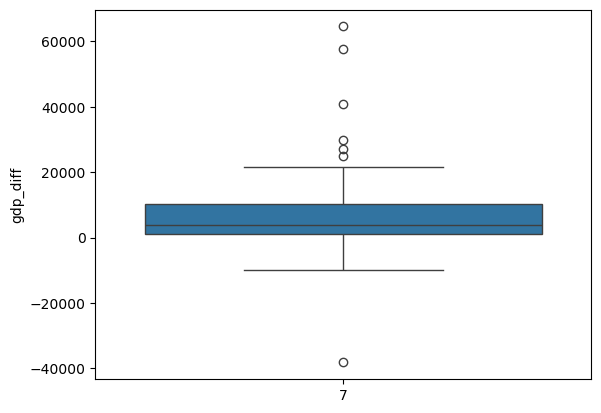

In [55]:
sns.boxplot(data=gdf,x=len('Country'),y='gdp_diff')

In [56]:
gdf=gdf.loc[gdf['gdp_diff']<0]
gdf

Year,Country,1990,2020,gdp_diff
16,Barbados,14097.395550,13805.777541,-291.618008
27,Brunei,70358.724094,61603.550804,-8755.173291
30,Burundi,1175.155086,711.355263,-463.799822
37,Central African Republic,1200.613390,847.765012,-352.848378
44,Congo,5007.319245,3384.654335,-1622.664909
51,Dem. Rep. Congo,1750.169739,1044.071214,-706.098525
74,Fragile and conflict affected situations,4864.814075,4357.621312,-507.192763
76,Gabon,17559.006114,13903.288955,-3655.717160
84,Guinea-Bissau,1998.173206,1803.630591,-194.542616
86,Haiti,3612.815105,2970.462845,-642.352260


In [57]:
gdf=gdf.reset_index()

In [58]:
gdf[['Country']]

Year,Country
0,Barbados
1,Brunei
2,Burundi
3,Central African Republic
4,Congo
5,Dem. Rep. Congo
6,Fragile and conflict affected situations
7,Gabon
8,Guinea-Bissau
9,Haiti


#### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [60]:
internet_df=pd.read_csv('../data/internet_use.csv',on_bad_lines='skip')
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [61]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6380 non-null   object 
 1   Year             6380 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 199.5+ KB


#### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [63]:
internet_df=internet_df.drop(columns=['Value Footnotes'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [64]:
internet_df=internet_df.rename(columns={'Country or Area' :'Country','Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [66]:
internet_df.Year.value_counts()

Year
1990                                                                                                     226
2007                                                                                                     217
2011                                                                                                     214
2008                                                                                                     214
2009                                                                                                     214
                                                                                                        ... 
Direct respondent as of 15.                                                                                1
INFORMANTE DIRECTO DE 15 AÑOS Y MÁS                                                                        1
La información corresponde si ha usado el Internet, desde cualquier lugar en los últimos 12 meses          1
Information re

In [67]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6380 non-null   object 
 1   Year                6380 non-null   object 
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), object(2)
memory usage: 149.7+ KB


In [68]:
internet_df['Year'].str.len()

0         4
1         4
2         4
3         4
4         4
       ... 
6375     69
6376     30
6377     18
6378     30
6379    101
Name: Year, Length: 6380, dtype: int64

In [69]:
in_df=internet_df[internet_df['Year'].str.len()==4]
in_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6082,Zimbabwe,1990,0.00
6224,141,0.83,NaN
6225,142,0.84,NaN
6242,159,0.98,NaN


In [70]:
in_df=in_df[in_df['Year'].str.contains(r'\d',na=False)]
in_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000
6224,141,0.83,NaN
6225,142,0.84,NaN


In [71]:
in_df['Year'].astype(float)

0       2019.00
1       2018.00
2       2017.00
3       2016.00
4       2015.00
         ...   
6081    1994.00
6082    1990.00
6224       0.83
6225       0.84
6242       0.98
Name: Year, Length: 6086, dtype: float64

In [72]:
in_df['Year']=pd.to_numeric(in_df['Year'],errors='coerce')
in_df

C:\Users\obuli\AppData\Local\Temp\ipykernel_34776\2367284253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_df['Year']=pd.to_numeric(in_df['Year'],errors='coerce')


,Country,Year,Internet_Users_Pct
0,Afghanistan,2019.00,17.600000
1,Afghanistan,2018.00,16.800000
2,Afghanistan,2017.00,13.500000
3,Afghanistan,2016.00,11.000000
4,Afghanistan,2015.00,8.260000
...,...,...,...
6081,Zimbabwe,1994.00,0.001739
6082,Zimbabwe,1990.00,0.000000
6224,141,0.83,NaN
6225,142,0.84,NaN


In [73]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6086 entries, 0 to 6242
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6086 non-null   object 
 1   Year                6086 non-null   float64
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(2), object(1)
memory usage: 190.2+ KB


In [74]:
indf=in_df.loc[in_df['Year']>1.00]
indf

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019.0,17.600000
1,Afghanistan,2018.0,16.800000
2,Afghanistan,2017.0,13.500000
3,Afghanistan,2016.0,11.000000
4,Afghanistan,2015.0,8.260000
...,...,...,...
6078,Zimbabwe,1997.0,0.033080
6079,Zimbabwe,1996.0,0.016790
6080,Zimbabwe,1995.0,0.007684
6081,Zimbabwe,1994.0,0.001739


In [75]:
indf['Year']=indf['Year'].astype(int)

C:\Users\obuli\AppData\Local\Temp\ipykernel_34776\3114204654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indf['Year']=indf['Year'].astype(int)


In [76]:
indf

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


#### 17. What is the first year to have a non-zero internet users percentage value?

In [78]:
indf_non_zero=indf[indf['Internet_Users_Pct']>0].sort_values('Internet_Users_Pct')
indf_non_zero.sort_values('Year').head(1)

,Country,Year,Internet_Users_Pct
5777,United Kingdom,1990,0.087355


In [79]:
print("The first year to have a non-zero internet users percentage value : ",indf_non_zero.Year.min())

The first year to have a non-zero internet users percentage value :  1990


#### 18. How does the distribution of internet users percent differ for 2000 and 2014?


In [81]:
indf_2000_14=indf[(indf['Year']>1999)&(indf['Year']<2015)]
indf_2000_14=indf_2000_14.pivot_table(index='Country',columns='Year',values='Internet_Users_Pct')
indf_2000_14.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,
Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.84,3.55,4.0,5.0,5.45455,5.9,7.0000
Albania,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.86,41.20,45.0,47.0,49.40000,51.8,54.3000
Algeria,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.18,11.23,12.5,14.9,18.20000,22.5,29.5000
Andorra,10.538800,NaN,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.04,78.53,81.0,81.0,82.70000,84.4,86.1000
Angola,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.50000,1.70000,1.90,2.30,2.8,4.7,7.70000,13.0,21.3623


In [82]:
df_2000_14=indf_2000_14.describe().round(2)
df_2000_14

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,210.00,212.00,214.00,208.00,210.00,212.00,212.00,217.00,214.00,214.00,209.00,214.00,209.00,203.00,204.00
mean,9.33,11.42,14.24,16.77,19.31,21.60,24.20,26.11,28.92,31.61,34.74,37.75,40.01,42.74,45.60
std,13.64,15.85,18.48,20.36,21.78,23.18,24.31,25.12,26.21,26.99,27.59,28.06,28.62,29.35,29.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.99
25%,0.48,0.64,1.13,1.77,2.60,3.32,4.30,4.75,6.23,7.20,8.00,10.02,12.00,14.00,17.40
50%,2.89,4.08,5.56,7.32,9.90,12.72,16.30,19.70,22.56,26.68,31.22,35.81,38.20,43.30,46.82
75%,10.54,15.74,20.04,24.61,29.33,34.22,38.00,40.79,45.63,50.76,55.00,59.65,62.31,66.60,70.26
max,58.62,64.60,79.12,83.14,83.89,87.00,89.51,90.60,92.96,95.84,95.84,96.38,96.92,96.90,98.16


In [83]:
df=df_2000_14.reset_index()
df=df.rename(columns={'Year':'ind','index':'category'})
df

Year,category,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,count,210.00,212.00,214.00,208.00,210.00,212.00,212.00,217.00,214.00,214.00,209.00,214.00,209.00,203.00,204.00
1,mean,9.33,11.42,14.24,16.77,19.31,21.60,24.20,26.11,28.92,31.61,34.74,37.75,40.01,42.74,45.60
2,std,13.64,15.85,18.48,20.36,21.78,23.18,24.31,25.12,26.21,26.99,27.59,28.06,28.62,29.35,29.30
3,min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.99
4,25%,0.48,0.64,1.13,1.77,2.60,3.32,4.30,4.75,6.23,7.20,8.00,10.02,12.00,14.00,17.40
5,50%,2.89,4.08,5.56,7.32,9.90,12.72,16.30,19.70,22.56,26.68,31.22,35.81,38.20,43.30,46.82
6,75%,10.54,15.74,20.04,24.61,29.33,34.22,38.00,40.79,45.63,50.76,55.00,59.65,62.31,66.60,70.26
7,max,58.62,64.60,79.12,83.14,83.89,87.00,89.51,90.60,92.96,95.84,95.84,96.38,96.92,96.90,98.16


In [84]:
df[['category',2000,2014]]

Year,category,2000,2014
0,count,210.00,204.00
1,mean,9.33,45.60
2,std,13.64,29.30
3,min,0.00,0.99
4,25%,0.48,17.40
5,50%,2.89,46.82
6,75%,10.54,70.26
7,max,58.62,98.16


#### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [86]:
print('Count of Countries that had the percentage of internet users below 5% in 2014  : ',
      indf.loc[(indf['Internet_Users_Pct']<5) & (indf['Year']==2014)]['Country'].nunique())

Count of Countries that had the percentage of internet users below 5% in 2014  :  10


#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [88]:
gdp_df.shape

(7662, 3)

In [89]:
indf.shape

(6083, 3)

In [90]:
gdp_and_internet_use=pd.merge(gdp_df,indf,left_on=['Country','Year'],right_on=['Country','Year'],how='outer')
gdp_and_internet_use

,Country,Year,GDP_Per_capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


#### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [92]:
top_country=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct',ascending=False).head(3)
top_country

,Country,Year,GDP_Per_capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


Text(0.5, 1.0, 'Top Countries GDP_Per_capita and Internet_users_Pct in 2014')

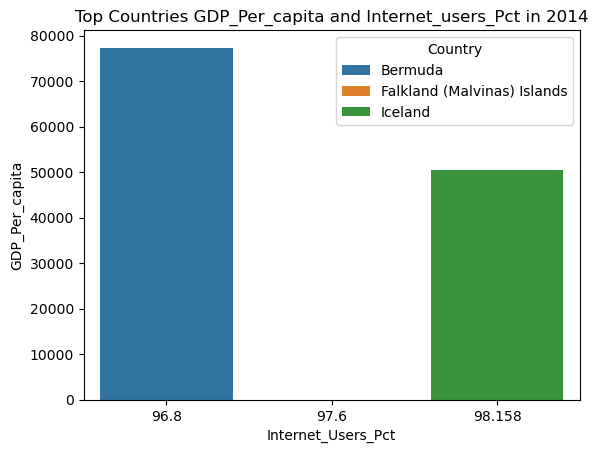

In [93]:
sns.barplot(x='Internet_Users_Pct',y='GDP_Per_capita',data=top_country,hue='Country')
plt.title('Top Countries GDP_Per_capita and Internet_users_Pct in 2014')

Text(0.5, 1.0, 'The GDP per capita changes over time for top countries')

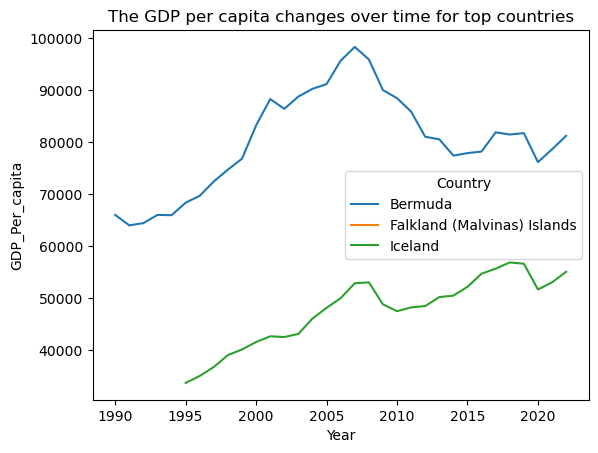

In [94]:
sns.lineplot(x='Year',y='GDP_Per_capita',data=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_country['Country'])],hue='Country')
plt.title('The GDP per capita changes over time for top countries')

In [95]:
gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_country['Country'])]

,Country,Year,GDP_Per_capita,Internet_Users_Pct
770,Bermuda,1990,65961.406278,0.0000
771,Bermuda,1991,63958.896254,NaN
772,Bermuda,1992,64385.407410,NaN
773,Bermuda,1993,65967.850014,NaN
774,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
3824,Iceland,2018,56816.566601,99.0110
3825,Iceland,2019,56584.168683,99.5049
3826,Iceland,2020,51641.392081,99.5328
3827,Iceland,2021,53003.170408,99.6870


#### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [97]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


In [98]:
gdp_and_internet_use_2014=gdp_and_internet_use_2014.reset_index(drop=True)
gdp_and_internet_use_2014

,Country,Year,GDP_Per_capita,Internet_Users_Pct
0,Afghanistan,2014,2144.449634,7.0000
1,Africa Eastern and Southern,2014,3642.875373,NaN
2,Africa Western and Central,2014,4146.994622,NaN
3,Albania,2014,11586.817446,54.3000
4,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
279,West Bank and Gaza,2014,5967.073437,NaN
280,World,2014,15120.730322,NaN
281,Yemen,2014,NaN,22.5500
282,Zambia,2014,3375.941270,6.5000


#### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_capita'>

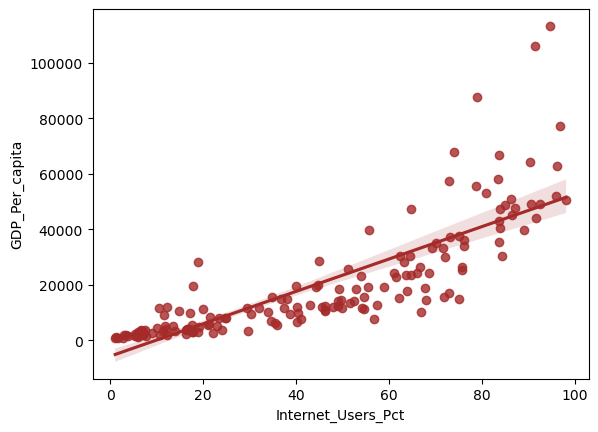

In [100]:
sns.regplot(x='Internet_Users_Pct',y='GDP_Per_capita',data=gdp_and_internet_use_2014,color='brown',)



#### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [102]:
gdp_and_internet_use_2014.sort_values(['GDP_Per_capita'])

,Country,Year,GDP_Per_capita,Internet_Users_Pct
42,Central African Republic,2014,765.259554,2.70000
35,Burundi,2014,831.294839,1.04239
232,Somalia,2014,925.577067,1.63000
63,Dem. Rep. Congo,2014,999.072134,NaN
188,Niger,2014,1119.137212,1.24868
...,...,...,...,...
250,Syrian Arab Republic,2014,NaN,28.09000
266,Türkiye,2014,NaN,51.03740
276,Venezuela,2014,NaN,57.00000
278,Virgin Islands (US),2014,NaN,50.07000


In [103]:
gdp_and_internet_use_2014['GDP_group']= pd.qcut(gdp_and_internet_use_2014.sort_values(['GDP_Per_capita'])['GDP_Per_capita'],
                                               q=3, labels=['Low','Medium','High'])


In [104]:
gdp_group_df=gdp_and_internet_use_2014.sort_values(['GDP_Per_capita'])
gdp_group_df

,Country,Year,GDP_Per_capita,Internet_Users_Pct,GDP_group
42,Central African Republic,2014,765.259554,2.70000,Low
35,Burundi,2014,831.294839,1.04239,Low
232,Somalia,2014,925.577067,1.63000,Low
63,Dem. Rep. Congo,2014,999.072134,NaN,Low
188,Niger,2014,1119.137212,1.24868,Low
...,...,...,...,...,...
250,Syrian Arab Republic,2014,NaN,28.09000,NaN
266,Türkiye,2014,NaN,51.03740,NaN
276,Venezuela,2014,NaN,57.00000,NaN
278,Virgin Islands (US),2014,NaN,50.07000,NaN


#### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


In [193]:
median_group=gdp_group_df.groupby('GDP_group')['Internet_Users_Pct'].median().reset_index().round(2)

In [195]:
median_group.columns=['GDP_group','median_group']
median_group

,GDP_group,median_group
0,Low,11.00
1,Medium,45.88
2,High,75.98
